<a href="https://colab.research.google.com/github/anushka4124/Air-Pollution-Control/blob/main/Heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [316]:
pip install ucimlrepo


In [90]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [98]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# metadata
print(heart_disease.metadata)

# variable information
print(heart_disease.variables)



{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Life Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M. Pfisterer, J. Schmid, S. Sandhu, K

In [99]:
import pandas as pd
X=pd.DataFrame(X)
y=pd.DataFrame(y)
# X.ffill(inplace=True)

In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [94]:
df=pd.DataFrame(heart_disease.variables)
print(df)

        name     role         type demographic  \
0        age  Feature      Integer         Age   
1        sex  Feature  Categorical         Sex   
2         cp  Feature  Categorical        None   
3   trestbps  Feature      Integer        None   
4       chol  Feature      Integer        None   
5        fbs  Feature  Categorical        None   
6    restecg  Feature  Categorical        None   
7    thalach  Feature      Integer        None   
8      exang  Feature  Categorical        None   
9    oldpeak  Feature      Integer        None   
10     slope  Feature  Categorical        None   
11        ca  Feature      Integer        None   
12      thal  Feature  Categorical        None   
13       num   Target      Integer        None   

                                          description  units missing_values  
0                                                None  years             no  
1                                                None   None             no  
2              

In [74]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
dtypes: float64(3), int64(10)
memory usage: 30.9 KB


In [101]:
X.describe()
y=np.array(y)
y=np.where(y!=0,1,0)
y=pd.DataFrame(y,columns=['target'])
print(y)

     target
0         0
1         1
2         1
3         0
4         0
..      ...
298       1
299       1
300       1
301       1
302       0

[303 rows x 1 columns]


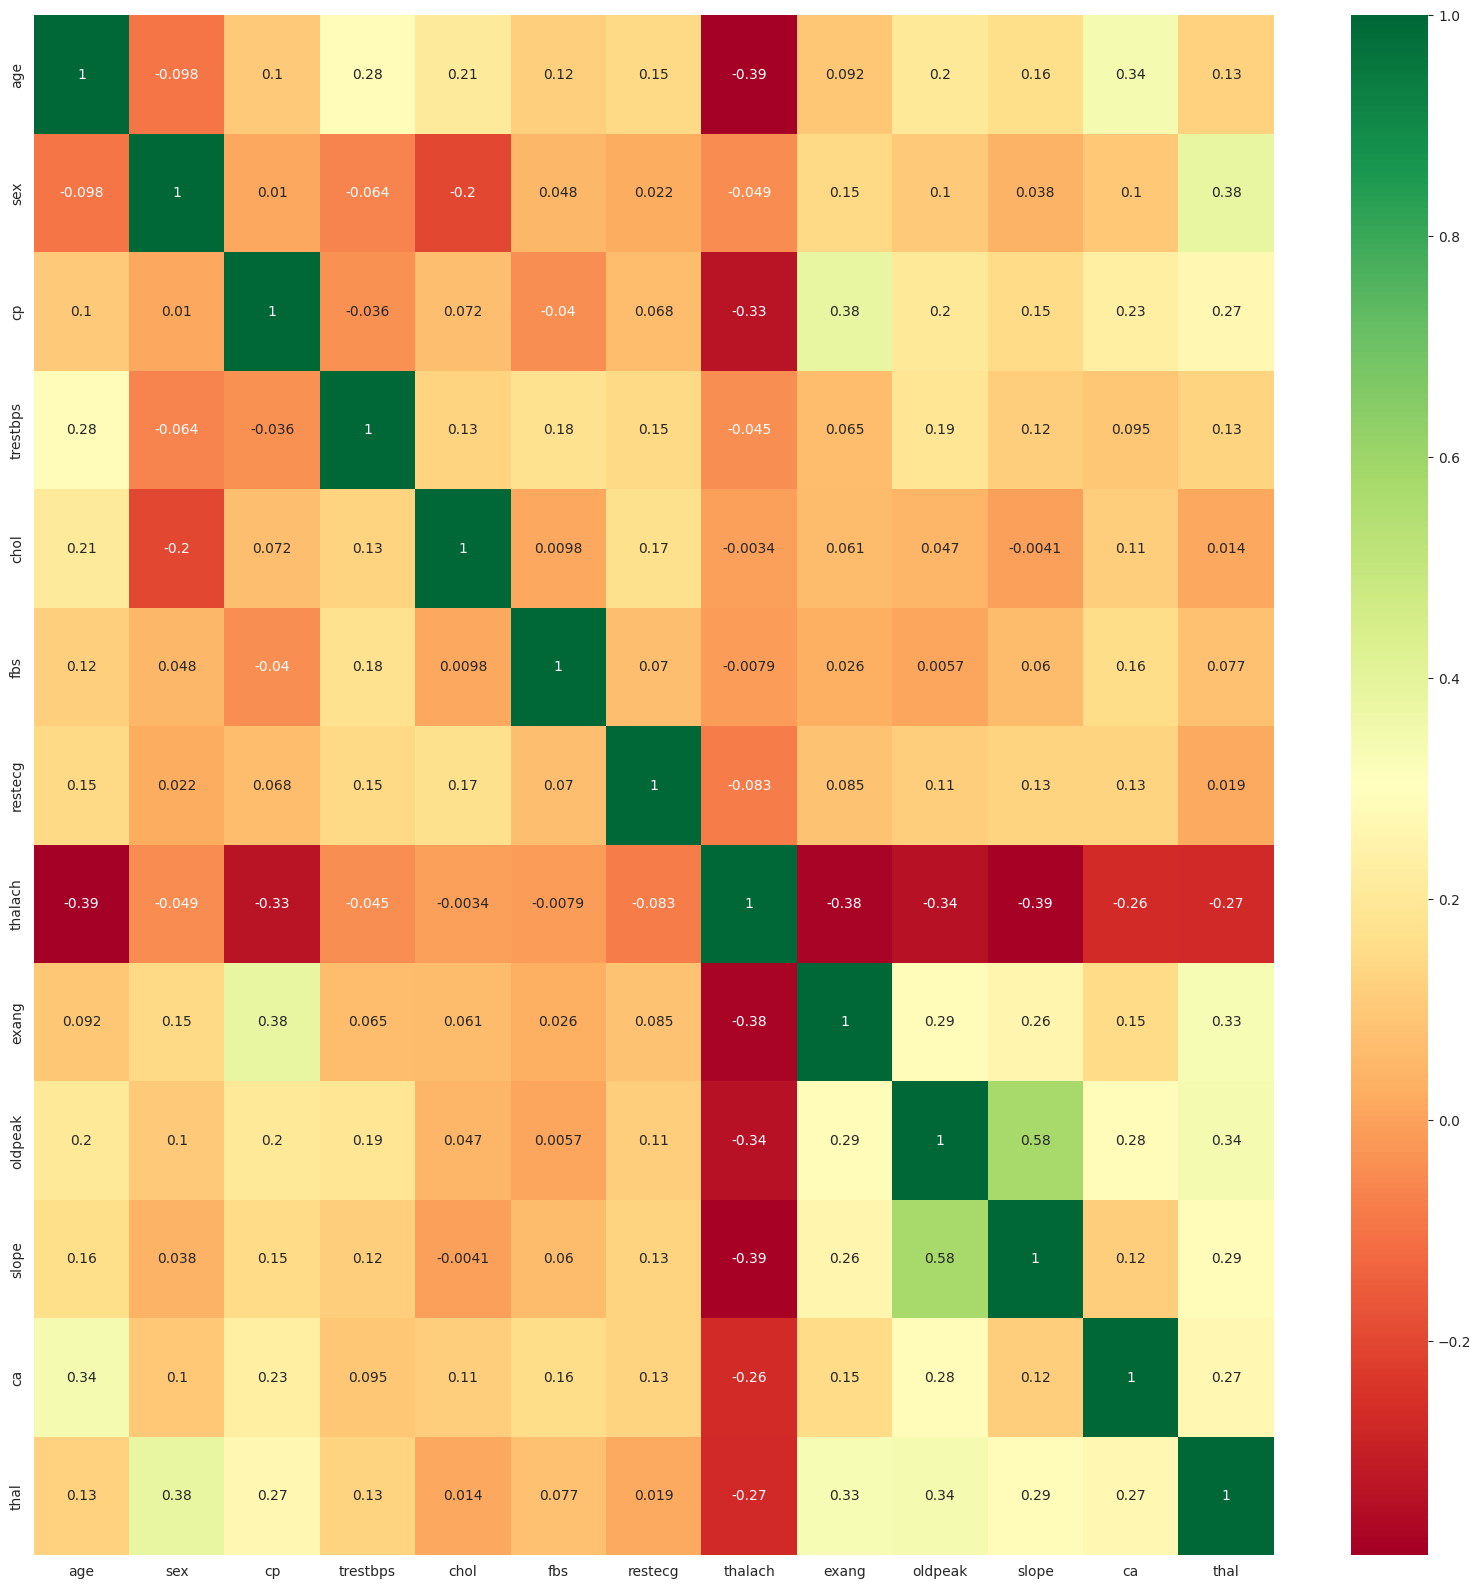

In [53]:
import seaborn as sns
corr_mat=X.corr()
top_corr_features=corr_mat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(X[top_corr_features].corr(),annot=True,cmap="RdYlGn")

array([[<Axes: title={'center': 'target'}>]], dtype=object)

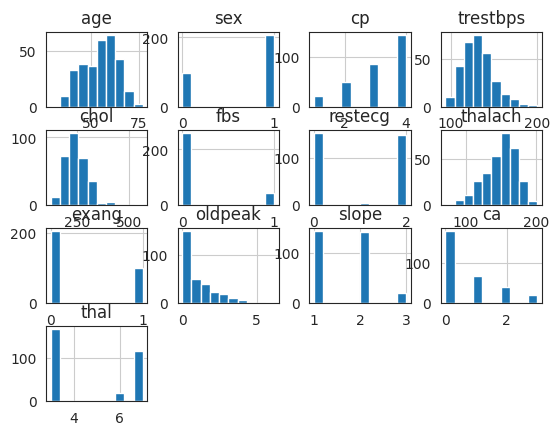

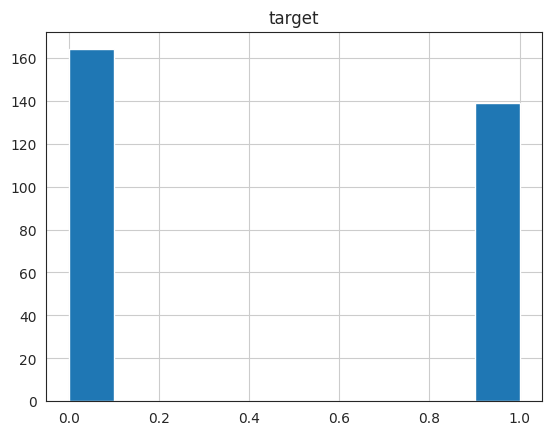

In [66]:
X.hist()
y.hist()

<Axes: xlabel='target', ylabel='count'>

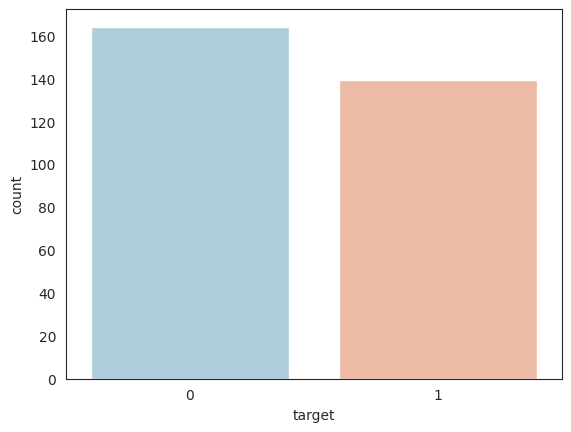

In [102]:
sns.set_style("white")
sns.countplot(palette="RdBu_r",data=y,x='target')



In [103]:
data=pd.get_dummies(X,columns=['sex','cp','fbs','restecg','exang','slope','thal'])

In [307]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
st=StandardScaler()
cols=['age','trestbps','chol','thalach','oldpeak']
data[cols]=st.fit_transform(data[cols])
data.head()

,age,trestbps,chol,thalach,oldpeak,ca,sex_0,sex_1,cp_1,cp_2,...,restecg_1,restecg_2,exang_0,exang_1,slope_1,slope_2,slope_3,thal_3.0,thal_6.0,thal_7.0
0,0.948726,0.757525,-0.264900,0.017197,1.087338,0.0,0,1,1,0,...,0,1,1,0,0,0,1,0,1,0
1,1.392002,1.611220,0.760415,-1.821905,0.397182,3.0,0,1,0,0,...,0,1,0,1,0,1,0,1,0,0
2,1.392002,-0.665300,-0.342283,-0.902354,1.346147,2.0,0,1,0,0,...,0,1,0,1,0,1,0,0,0,1
3,-1.932564,-0.096170,0.063974,1.637359,2.122573,0.0,0,1,0,0,...,0,0,1,0,0,0,1,1,0,0
4,-1.489288,-0.096170,-0.825922,0.980537,0.310912,0.0,1,0,0,1,...,0,1,1,0,1,0,0,1,0,0


In [110]:
missing=X.isnull().any().any()
print(missing)

False


In [109]:
X.ffill(inplace=True)


In [272]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=46)
model=RandomForestClassifier(random_state=43)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report
accuracy=accuracy_score(y_test,y_pred)
print(f"Model accuracy: {accuracy:.2f}")
report=classification_report(y_test,y_pred)
print("Classification Report: \n",report)


Model accuracy: 0.90
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.87      0.92        38
           1       0.81      0.96      0.88        23

    accuracy                           0.90        61
   macro avg       0.89      0.91      0.90        61
weighted avg       0.91      0.90      0.90        61



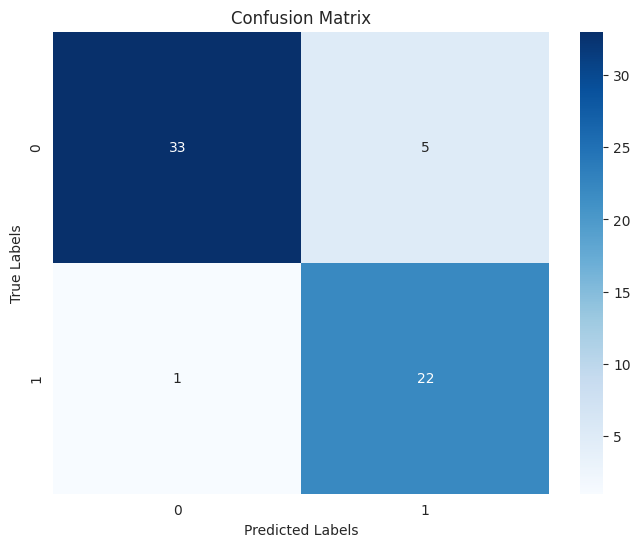

In [273]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you already have y_test and y_pred
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [274]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)
model=KNeighborsClassifier(metric='hamming') #hamming
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report
accuracy=accuracy_score(y_test,y_pred)
print(f"Model accuracy: {accuracy:.2f}")
report=classification_report(y_test,y_pred)
print("Classification Report: \n",report)

Model accuracy: 0.84
Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.94      0.86        32
           1       0.91      0.72      0.81        29

    accuracy                           0.84        61
   macro avg       0.85      0.83      0.83        61
weighted avg       0.85      0.84      0.83        61



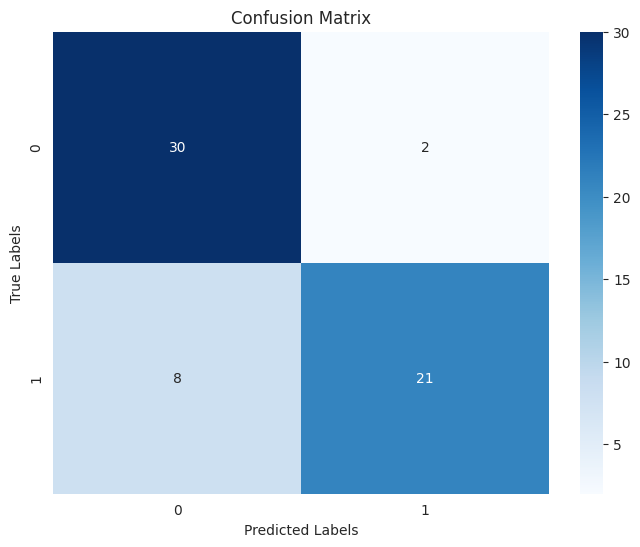

In [276]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you already have y_test and y_pred
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [314]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=46)
model=DecisionTreeClassifier(random_state=42,min_samples_split=10)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report
accuracy=accuracy_score(y_test,y_pred)
print(f"Model accuracy: {accuracy:.2f}")
report=classification_report(y_test,y_pred)
print("Classification Report: \n",report)

Model accuracy: 0.80
Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.84      0.84        38
           1       0.74      0.74      0.74        23

    accuracy                           0.80        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.80      0.80      0.80        61



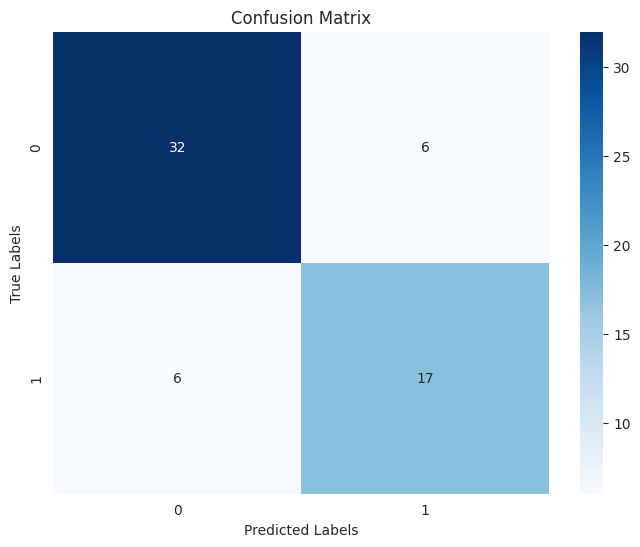

In [278]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you already have y_test and y_pred
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [281]:
from sklearn.linear_model import LogisticRegression
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=46)
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report
accuracy=accuracy_score(y_test,y_pred)
print(f"Model accuracy: {accuracy:.2f}")
report=classification_report(y_test,y_pred)
print("Classification Report: \n",report)

Model accuracy: 0.93
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        38
           1       0.91      0.91      0.91        23

    accuracy                           0.93        61
   macro avg       0.93      0.93      0.93        61
weighted avg       0.93      0.93      0.93        61



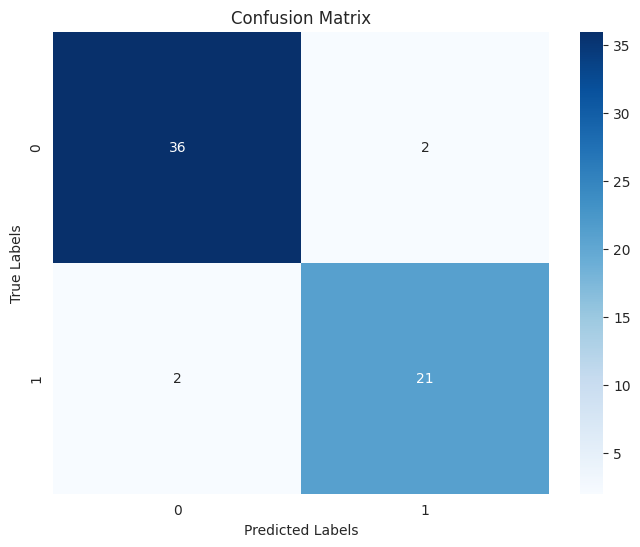

In [280]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you already have y_test and y_pred
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [310]:
from xgboost import XGBClassifier
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=50)
model=XGBClassifier(random_state=42)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report
accuracy=accuracy_score(y_test,y_pred)
print(f"Model accuracy: {accuracy:.2f}")
report=classification_report(y_test,y_pred)
print("Classification Report: \n",report)

Model accuracy: 0.87
Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.90      0.87        30
           1       0.90      0.84      0.87        31

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



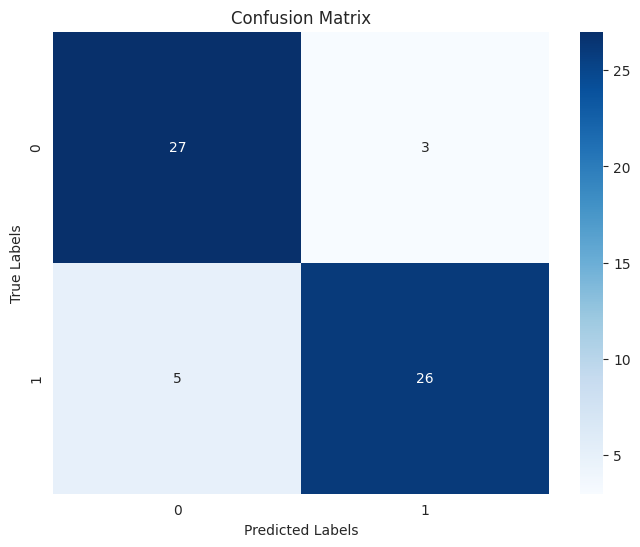

In [311]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you already have y_test and y_pred
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()